# World Happiness Report

## Load libraries

In [53]:
import pandas as pd
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize


## Load Dataset

In [66]:
df_2015 = pd.read_csv(r'2015.csv')

## Summarize Data

In [144]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [145]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [146]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Dataset Visualization

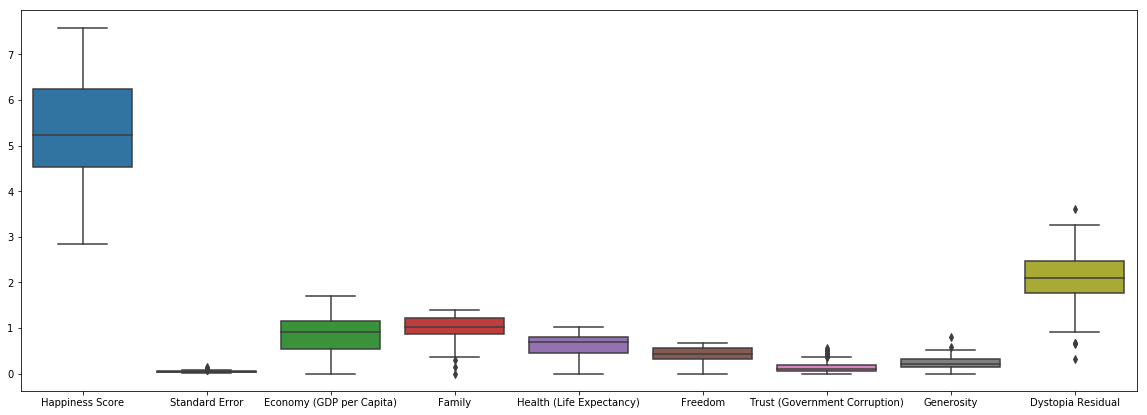

In [147]:
df_2015_box = df_2015.drop(['Happiness Rank'], axis=1)
plt.figure(figsize=(20,7))
sns.boxplot(data=df_2015_box)

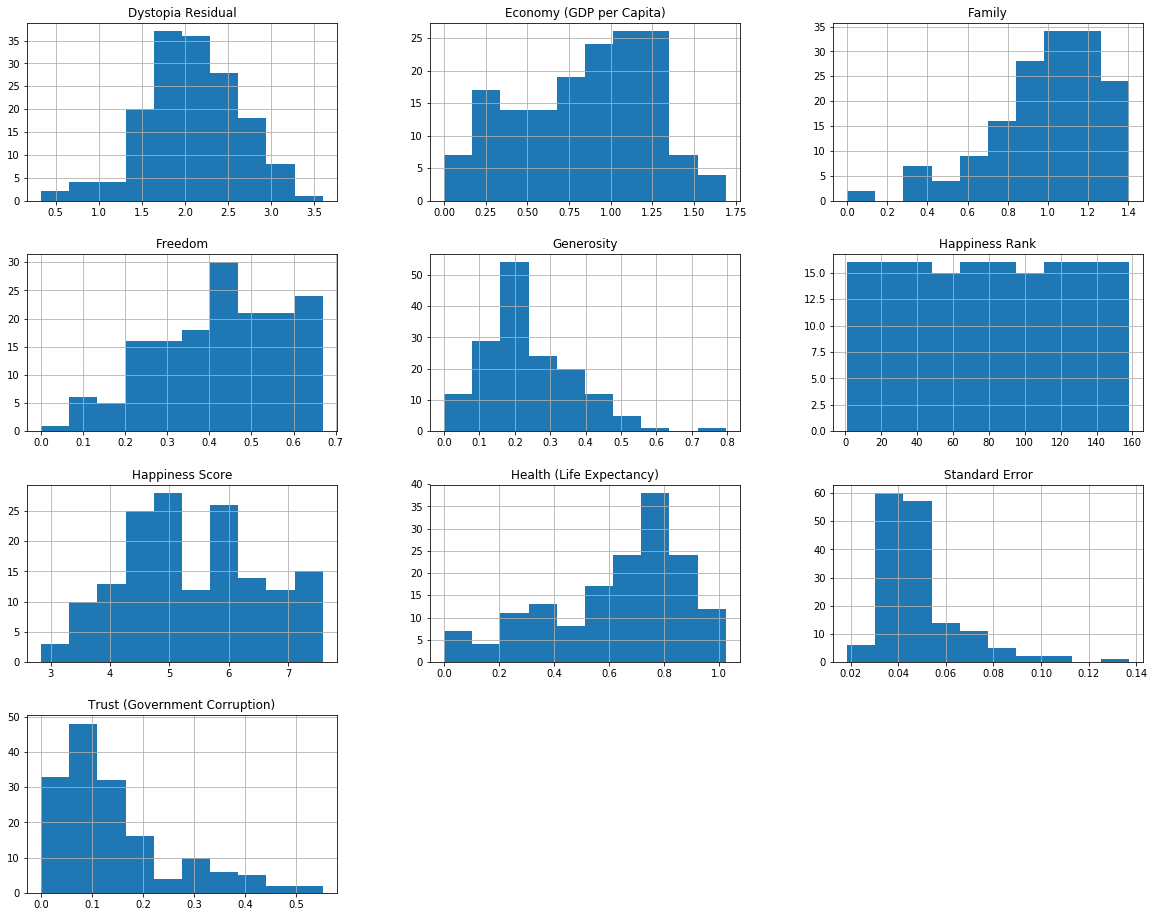

In [148]:
df_2015.hist(figsize = (20,16))
plt.show()

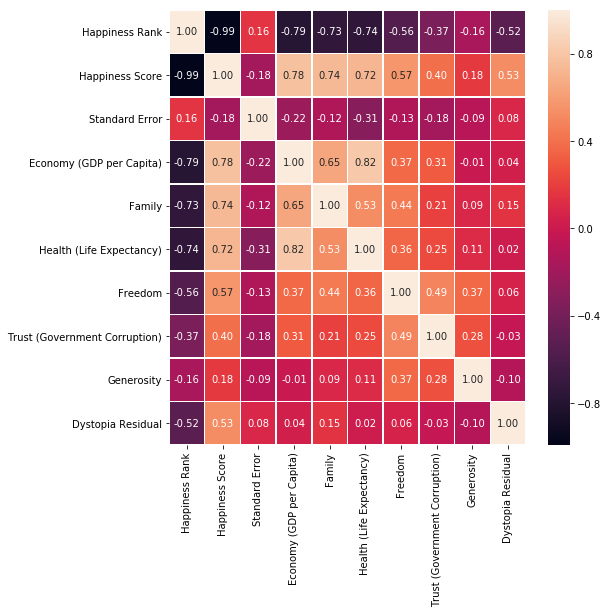

In [175]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_2015.corr(),annot=True,linewidths=.5,fmt=".2f",ax=ax)
plt.show()

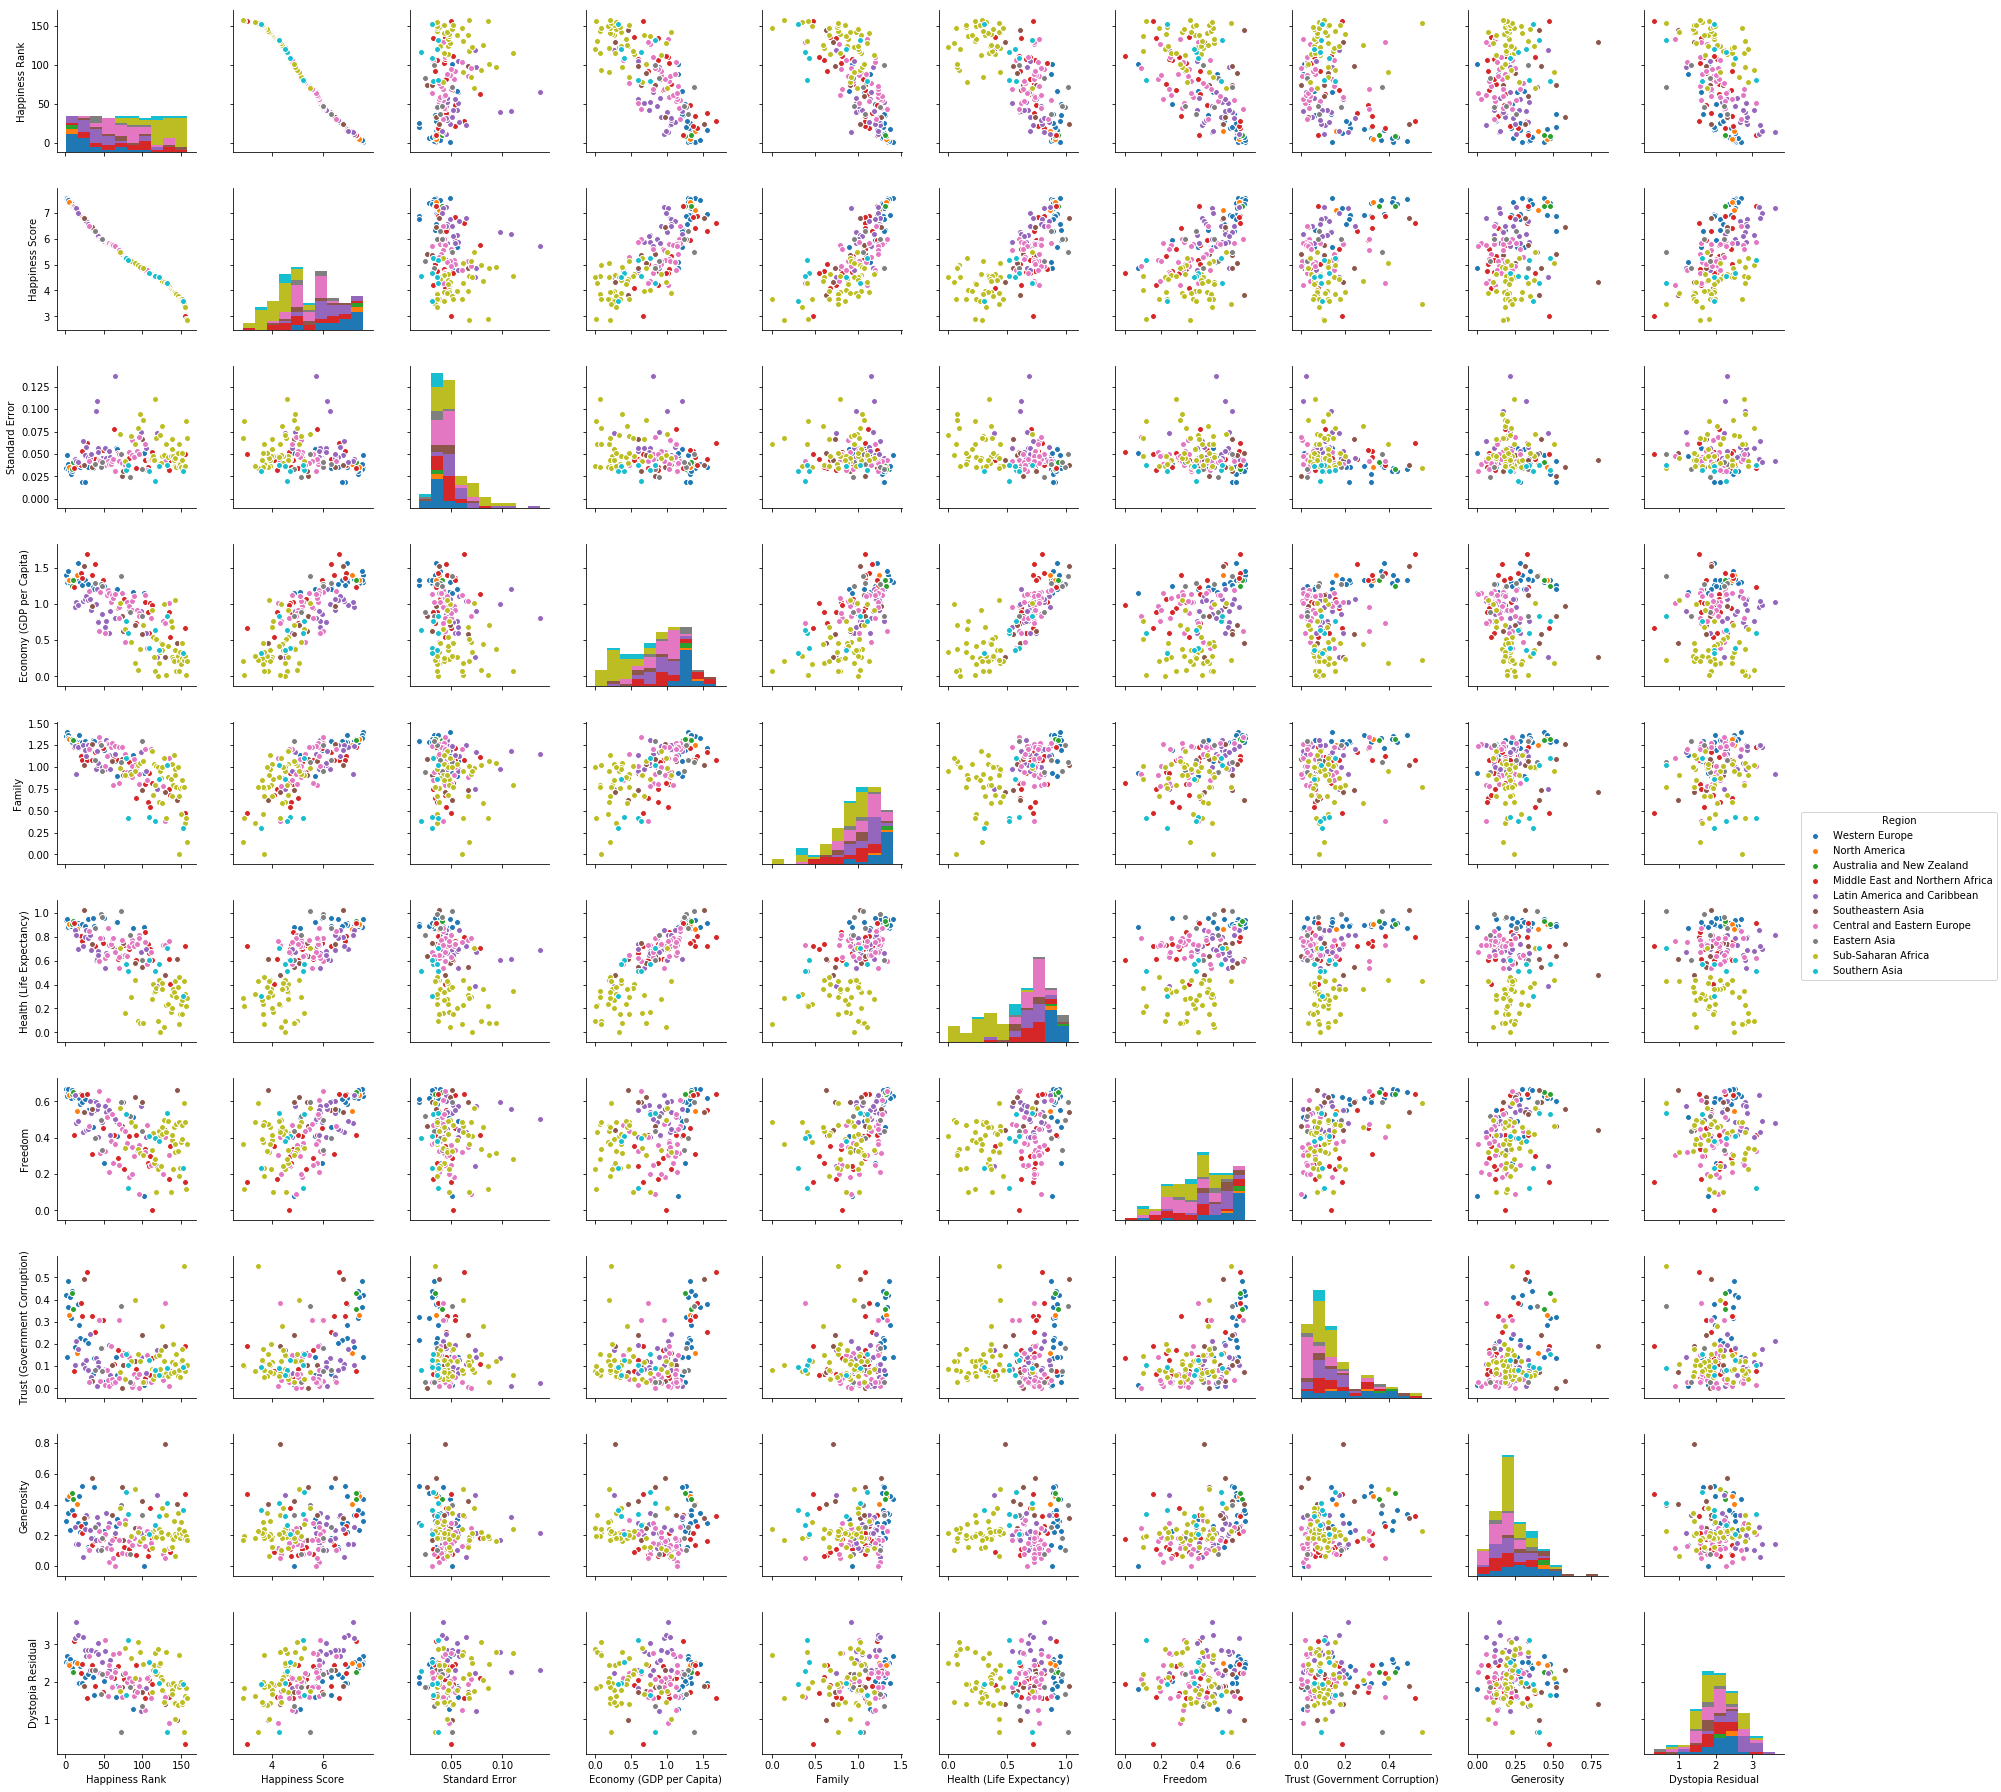

In [151]:
sns.pairplot(df_2015, hue='Region')

In [152]:
df_2015.groupby(['Region']).size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

## Data preparation

In [67]:
df_2015=df_2015.drop(['Country','Happiness Rank','Happiness Score'], axis=1)

In [4]:
df_2015.dropna()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Western Europe,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Western Europe,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Western Europe,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,Australia and New Zealand,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia and New Zealand,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [68]:
#retirar classes com 2
df_2015=df_2015[(df_2015.Region != 'Australia and New Zealand') & (df_2015.Region != 'North America')]

## Algorithm evaluation

In [69]:
X_2015 = df_2015.drop(['Region'], axis=1)
X_2015.shape

(154, 8)

In [70]:
y_2015 = df_2015['Region']
y_2015.shape

(154,)

In [71]:
validation_size =0.2
seed = 7
Xtrain, Xtest, ytrain, ytest = train_test_split(X_2015, y_2015, random_state=seed, test_size=validation_size)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(123, 8)
(123,)
(31, 8)
(31,)


In [72]:
num_folds=10
scoring='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [73]:
results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=seed)
for name, model in models:
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.496795 (0.121702)
LDA: 0.602564 (0.105448)
KNN: 0.528846 (0.117406)
CART: 0.594231 (0.093381)
NB: 0.593590 (0.120308)
SVM: 0.457051 (0.126951)


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing



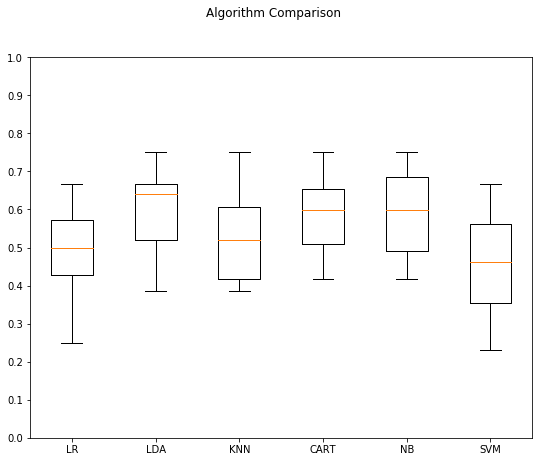

In [10]:
fig = plt.figure(figsize=(9,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

### Standardize Data

In [11]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.594231 (0.137874)


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


ScaledLDA: 0.602564 (0.105448)
ScaledKNN: 0.617308 (0.125191)
ScaledCART: 0.610256 (0.091098)
ScaledNB: 0.593590 (0.120308)
ScaledSVM: 0.626282 (0.126724)


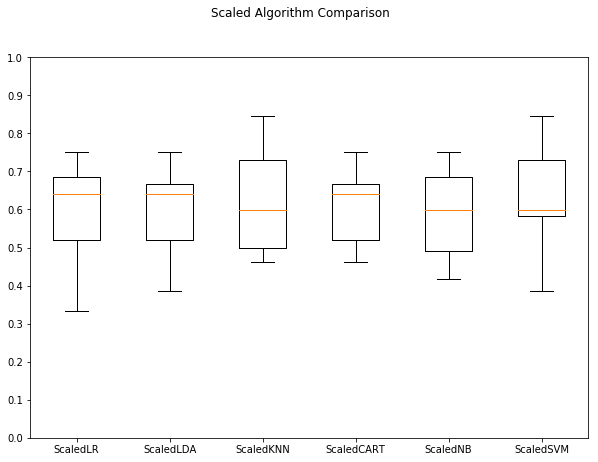

In [12]:
fig1 = plt.figure(figsize=(10,7))
fig1.suptitle('Scaled Algorithm Comparison')
ax = fig1.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

## Algorithm Tuning

In [13]:
scaler = StandardScaler().fit(Xtrain)
rescaledX = scaler.transform(Xtrain)

### LDA

In [14]:
lda = LinearDiscriminantAnalysis()
grid_param = {  
    'n_components': [1,2,3,4,5,6,7,8,9],
    'solver': ['svd', 'lsqr', 'eigen']
}
grid = GridSearchCV(estimator=lda,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/nbuser/anaconda3

Best: 0.601626 using {'solver': 'svd', 'n_components': 1}
0.601626 (0.106303) with: {'solver': 'svd', 'n_components': 1}
0.601626 (0.106303) with: {'solver': 'lsqr', 'n_components': 1}
0.601626 (0.143265) with: {'solver': 'eigen', 'n_components': 1}
0.601626 (0.106303) with: {'solver': 'svd', 'n_components': 2}
0.601626 (0.106303) with: {'solver': 'lsqr', 'n_components': 2}
0.601626 (0.143265) with: {'solver': 'eigen', 'n_components': 2}
0.601626 (0.106303) with: {'solver': 'svd', 'n_components': 3}
0.601626 (0.106303) with: {'solver': 'lsqr', 'n_components': 3}
0.601626 (0.143265) with: {'solver': 'eigen', 'n_components': 3}
0.601626 (0.106303) with: {'solver': 'svd', 'n_components': 4}
0.601626 (0.106303) with: {'solver': 'lsqr', 'n_components': 4}
0.601626 (0.143265) with: {'solver': 'eigen', 'n_components': 4}
0.601626 (0.106303) with: {'solver': 'svd', 'n_components': 5}
0.601626 (0.106303) with: {'solver': 'lsqr', 'n_components': 5}
0.601626 (0.143265) with: {'solver': 'eigen', '

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


### KNN

In [15]:
knn = KNeighborsClassifier()
grid_param = {  
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}
grid = GridSearchCV(estimator=knn,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674797 using {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.609756 (0.117487) with: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}
0.609756 (0.117487) with: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'distance'}
0.626016 (0.144255) with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
0.674797 (0.136350) with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.609756 (0.135799) with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
0.642276 (0.130462) with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
0.585366 (0.132952) with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
0.617886 (0.133572) with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
0.593496 (0.093367) with: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
0.609756 (0.115473) with: {'algorithm': 'ball_tree', 'n_neighbors': 9,

### SVM

In [16]:
svm = SVC()
grid_param = {  
    'C': [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid = GridSearchCV(estimator=svm,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.650407 using {'kernel': 'rbf', 'C': 1.7}
0.601626 (0.145967) with: {'kernel': 'linear', 'C': 0.1}
0.268293 (0.142900) with: {'kernel': 'poly', 'C': 0.1}
0.252033 (0.149031) with: {'kernel': 'rbf', 'C': 0.1}
0.455285 (0.106255) with: {'kernel': 'sigmoid', 'C': 0.1}
0.642276 (0.113592) with: {'kernel': 'linear', 'C': 0.3}
0.471545 (0.122824) with: {'kernel': 'poly', 'C': 0.3}
0.536585 (0.116700) with: {'kernel': 'rbf', 'C': 0.3}
0.560976 (0.118107) with: {'kernel': 'sigmoid', 'C': 0.3}
0.617886 (0.142811) with: {'kernel': 'linear', 'C': 0.5}
0.487805 (0.125486) with: {'kernel': 'poly', 'C': 0.5}
0.601626 (0.124167) with: {'kernel': 'rbf', 'C': 0.5}
0.577236 (0.130851) with: {'kernel': 'sigmoid', 'C': 0.5}
0.609756 (0.141807) with: {'kernel': 'linear', 'C': 0.7}
0.512195 (0.090785) with: {'kernel': 'poly', 'C': 0.7}
0.609756 (0.122269) with: {'kernel': 'rbf', 'C': 0.7}
0.585366 (0.149555) with: {'kernel': 'sigmoid', 'C': 0.7}
0.617886 (0.138363) with: {'kernel': 'linear', 'C': 0.9

### LR

In [17]:
lr = LogisticRegression()
grid_param = {  
    'C': [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid = GridSearchCV(estimator=lr,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarni

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarni

Best: 0.642276 using {'solver': 'newton-cg', 'C': 1.3}
0.569106 (0.118483) with: {'solver': 'newton-cg', 'C': 0.1}
0.569106 (0.118483) with: {'solver': 'lbfgs', 'C': 0.1}
0.569106 (0.135897) with: {'solver': 'liblinear', 'C': 0.1}
0.569106 (0.118483) with: {'solver': 'sag', 'C': 0.1}
0.569106 (0.118483) with: {'solver': 'saga', 'C': 0.1}
0.609756 (0.144897) with: {'solver': 'newton-cg', 'C': 0.3}
0.609756 (0.144897) with: {'solver': 'lbfgs', 'C': 0.3}
0.593496 (0.127161) with: {'solver': 'liblinear', 'C': 0.3}
0.609756 (0.144897) with: {'solver': 'sag', 'C': 0.3}
0.609756 (0.144897) with: {'solver': 'saga', 'C': 0.3}
0.617886 (0.136276) with: {'solver': 'newton-cg', 'C': 0.5}
0.617886 (0.136276) with: {'solver': 'lbfgs', 'C': 0.5}
0.593496 (0.125303) with: {'solver': 'liblinear', 'C': 0.5}
0.617886 (0.136276) with: {'solver': 'sag', 'C': 0.5}
0.617886 (0.136276) with: {'solver': 'saga', 'C': 0.5}
0.626016 (0.126137) with: {'solver': 'newton-cg', 'C': 0.7}
0.626016 (0.126137) with: {'so

### CART

In [18]:
cart = DecisionTreeClassifier()
grid_param = {  
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
grid = GridSearchCV(estimator=cart,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(rescaledX, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.593496 using {'splitter': 'best', 'criterion': 'gini'}
0.593496 (0.099054) with: {'splitter': 'best', 'criterion': 'gini'}
0.471545 (0.129837) with: {'splitter': 'random', 'criterion': 'gini'}
0.577236 (0.140084) with: {'splitter': 'best', 'criterion': 'entropy'}
0.552846 (0.117611) with: {'splitter': 'random', 'criterion': 'entropy'}


## Emsembles

In [19]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

AB: 0.278205 (0.109584)
GBM: 0.602564 (0.087000)
RF: 0.653205 (0.103896)
ET: 0.577564 (0.083700)


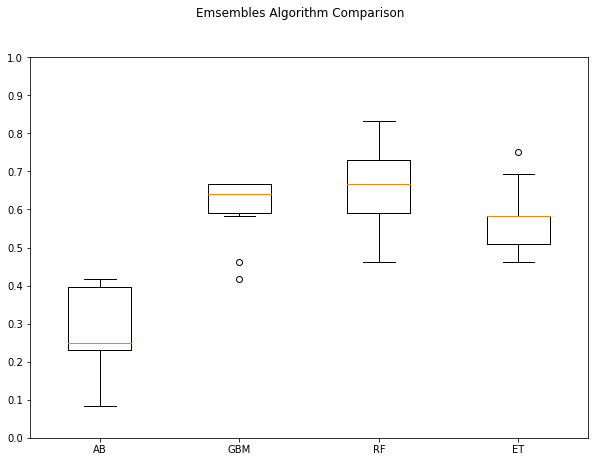

In [20]:
fig2 = plt.figure(figsize=(10,7))
fig2.suptitle('Emsembles Algorithm Comparison')
ax = fig2.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

### Random Forest

In [61]:
rf = RandomForestClassifier()
grid_param = {  
    'n_estimators': [10, 50, 100,300,500,700,1000,1500,2000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
grid = GridSearchCV(estimator=rf,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.690476 using {'criterion': 'entropy', 'n_estimators': 2000, 'bootstrap': False}
0.571429 (0.144199) with: {'criterion': 'gini', 'n_estimators': 10, 'bootstrap': True}
0.666667 (0.149276) with: {'criterion': 'gini', 'n_estimators': 50, 'bootstrap': True}
0.658730 (0.132630) with: {'criterion': 'gini', 'n_estimators': 100, 'bootstrap': True}
0.658730 (0.126142) with: {'criterion': 'gini', 'n_estimators': 300, 'bootstrap': True}
0.666667 (0.130354) with: {'criterion': 'gini', 'n_estimators': 500, 'bootstrap': True}
0.666667 (0.146002) with: {'criterion': 'gini', 'n_estimators': 700, 'bootstrap': True}
0.658730 (0.146483) with: {'criterion': 'gini', 'n_estimators': 1000, 'bootstrap': True}
0.674603 (0.140816) with: {'criterion': 'gini', 'n_estimators': 1500, 'bootstrap': True}
0.658730 (0.142254) with: {'criterion': 'gini', 'n_estimators': 2000, 'bootstrap': True}
0.579365 (0.128426) with: {'criterion': 'entropy', 'n_estimators': 10, 'bootstrap': True}
0.642857 (0.134173) with: {'c

### Gradient Boosting

In [31]:
gbm = GradientBoostingClassifier()
grid_param = {  
    'n_estimators': [10,50,100,300,500,700,1000,1500,2000],
    'criterion': ['friedman_mse', 'mse', 'mae']
}
grid = GridSearchCV(estimator=gbm,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.617886 using {'criterion': 'mse', 'n_estimators': 700}
0.593496 (0.080799) with: {'criterion': 'friedman_mse', 'n_estimators': 10}
0.601626 (0.128295) with: {'criterion': 'friedman_mse', 'n_estimators': 50}
0.609756 (0.091274) with: {'criterion': 'friedman_mse', 'n_estimators': 100}
0.609756 (0.071776) with: {'criterion': 'friedman_mse', 'n_estimators': 300}
0.585366 (0.085470) with: {'criterion': 'friedman_mse', 'n_estimators': 500}
0.593496 (0.084272) with: {'criterion': 'friedman_mse', 'n_estimators': 700}
0.609756 (0.071776) with: {'criterion': 'friedman_mse', 'n_estimators': 1000}
0.609756 (0.071776) with: {'criterion': 'friedman_mse', 'n_estimators': 1500}
0.609756 (0.091274) with: {'criterion': 'friedman_mse', 'n_estimators': 2000}
0.593496 (0.088789) with: {'criterion': 'mse', 'n_estimators': 10}
0.609756 (0.106553) with: {'criterion': 'mse', 'n_estimators': 50}
0.593496 (0.088789) with: {'criterion': 'mse', 'n_estimators': 100}
0.585366 (0.089927) with: {'criterion': '

### Extra Trees

In [32]:
et = ExtraTreesClassifier()
grid_param = {  
    'n_estimators': [10,50,100,300,500,700,1000,1500,2000],
    'criterion': ['gini', 'entropy'],
    'bootstrap' : [True, False]
}
grid = GridSearchCV(estimator=et,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.682927 using {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 50}
0.569106 (0.120230) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 10}
0.666667 (0.054979) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
0.666667 (0.097659) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
0.658537 (0.095700) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}
0.658537 (0.124146) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}
0.650407 (0.120568) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 700}
0.666667 (0.132329) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1000}
0.666667 (0.107320) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1500}
0.666667 (0.132329) with: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 2000}
0.626016 (0.108357) with: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 10}
0.601626 (0.111565) with: {'bootst

### AdaBoost

In [311]:
ab = AdaBoostClassifier()
grid_param = {  
    'n_estimators': [10,50,100,300,500,700,1000,1500,2000],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid = GridSearchCV(estimator=ab,param_grid=grid_param,
                    scoring=scoring,
                     cv=kfold,
                     n_jobs=-1)
grid_result= grid.fit(Xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.593496 using {'algorithm': 'SAMME', 'n_estimators': 300}
0.528455 (0.170601) with: {'algorithm': 'SAMME', 'n_estimators': 10}
0.560976 (0.134799) with: {'algorithm': 'SAMME', 'n_estimators': 50}
0.585366 (0.111177) with: {'algorithm': 'SAMME', 'n_estimators': 100}
0.593496 (0.125718) with: {'algorithm': 'SAMME', 'n_estimators': 300}
0.552846 (0.116944) with: {'algorithm': 'SAMME', 'n_estimators': 500}
0.577236 (0.106231) with: {'algorithm': 'SAMME', 'n_estimators': 700}
0.569106 (0.114683) with: {'algorithm': 'SAMME', 'n_estimators': 1000}
0.577236 (0.090610) with: {'algorithm': 'SAMME', 'n_estimators': 1500}
0.544715 (0.121151) with: {'algorithm': 'SAMME', 'n_estimators': 2000}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 10}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 50}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 100}
0.276423 (0.108972) with: {'algorithm': 'SAMME.R', 'n_estimators': 300}
0.276423 (0.108972

## Finalize Model

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [74]:
random_forest = RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=500)
random_forest.fit(Xtrain, ytrain)
ypred = random_forest.predict(Xtest)

In [11]:
n_nodes = []
max_depths = []

for ind_tree in random_forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print("Average number of nodes: "+str(np.array(n_nodes).mean()))
print("Average maximum depth: "+str(np.array(max_depths).mean()))

Average number of nodes: 89.14
Average maximum depth: 10.576


In [48]:
'''nearest_neighbors = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 3, weights= 'distance')
nearest_neighbors.fit(rescaledX, ytrain)
rescaledtestX = scaler.transform(Xtest)
ypred = nearest_neighbors.predict(rescaledtestX)'''

"nearest_neighbors = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 3, weights= 'distance')\nnearest_neighbors.fit(rescaledX, ytrain)\nrescaledtestX = scaler.transform(Xtest)\nypred = nearest_neighbors.predict(rescaledtestX)"

<module 'matplotlib.pyplot' from 'C:\\Users\\kuser\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

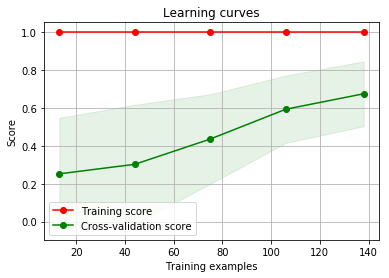

In [102]:
plot_learning_curve(random_forest, "Learning curves", X_2015, y_2015, cv=kfold, n_jobs=-1)

In [75]:
accuracy_score(ytest, ypred)

0.7419354838709677

In [76]:
print(metrics.classification_report(ypred, ytest))

                                 precision    recall  f1-score   support

     Central and Eastern Europe       0.57      0.80      0.67         5
                   Eastern Asia       0.00      0.00      0.00         0
    Latin America and Caribbean       1.00      0.83      0.91         6
Middle East and Northern Africa       0.00      0.00      0.00         3
              Southeastern Asia       0.00      0.00      0.00         1
                  Southern Asia       0.00      0.00      0.00         0
             Sub-Saharan Africa       0.92      0.92      0.92        12
                 Western Europe       1.00      0.75      0.86         4

                    avg / total       0.77      0.74      0.75        31



/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



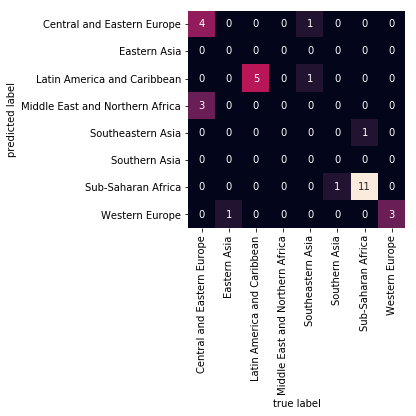

In [77]:
regions=sorted(set(ytrain.tolist()))
ax= plt.subplot()
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, ax = ax, square=True, annot=True, fmt='d', cbar=False, xticklabels=regions, yticklabels=regions)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [78]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(ytest)
    y_pred = lb.transform(ypred)
    return roc_auc_score(y_test, y_pred, average=average)

print(multiclass_roc_auc_score(ytest, ypred))

0.7346527435489065


In [79]:
result_rf = pd.DataFrame({
    'Actual':ytest,
    'Predicted':ypred
})
result_rf.head()

,Actual,Predicted
92,Central and Eastern Europe,Middle East and Northern Africa
130,Sub-Saharan Africa,Sub-Saharan Africa
49,Western Europe,Western Europe
15,Latin America and Caribbean,Latin America and Caribbean
56,Latin America and Caribbean,Latin America and Caribbean


In [80]:
fi = pd.DataFrame({'feature': list(Xtrain.columns),
                   'importance': random_forest.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi

,feature,importance
3,Health (Life Expectancy),0.265192
1,Economy (GDP per Capita),0.178538
2,Family,0.104797
6,Generosity,0.100713
0,Standard Error,0.096274
4,Freedom,0.089112
5,Trust (Government Corruption),0.087695
7,Dystopia Residual,0.077679


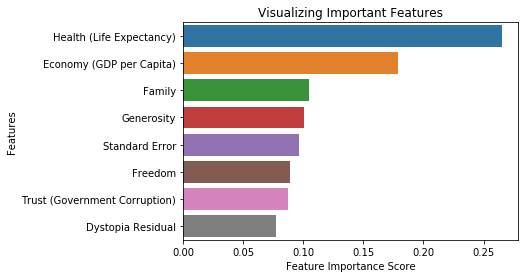

In [81]:
# Creating a bar plot
sns.barplot(x=fi['importance'], y=fi['feature'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

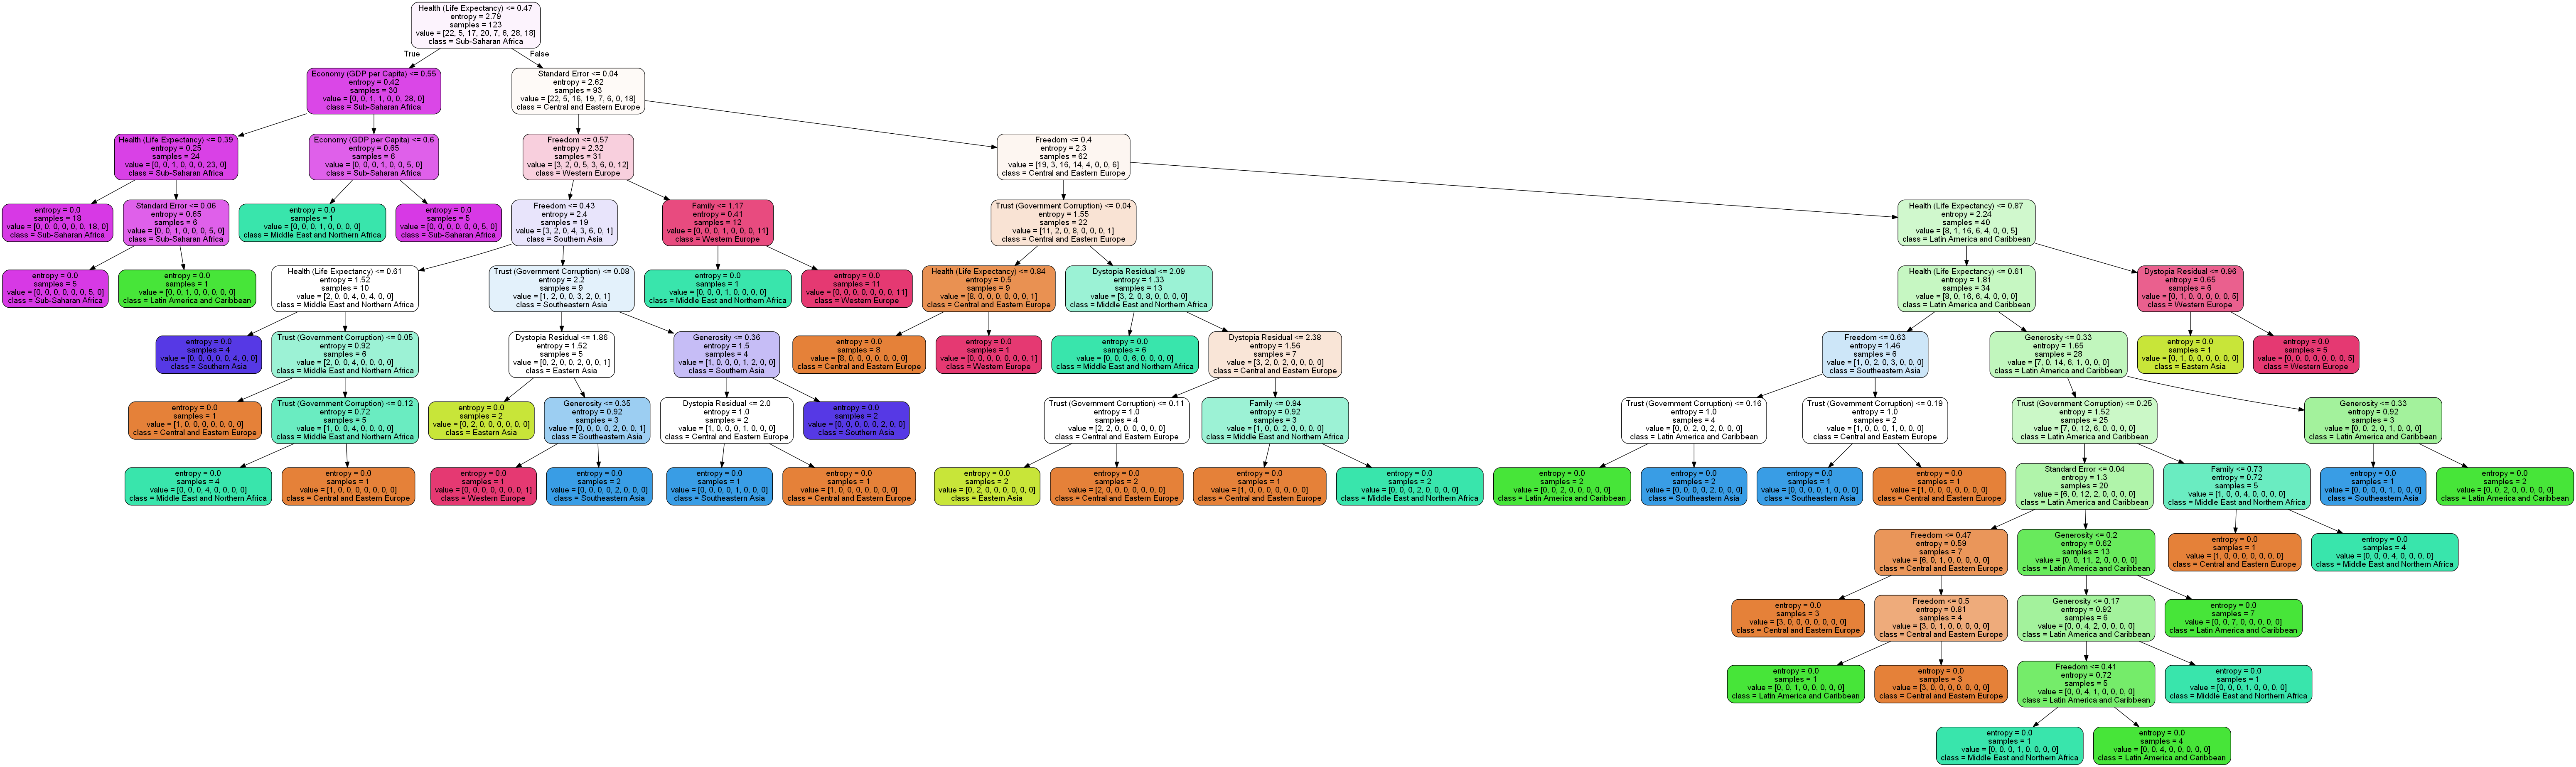

In [33]:
# Extract single tree
estimator = random_forest.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(X_2015.columns.values),
                class_names = regions,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
os.system('dot -Tpng tree.dot -o tree.png')
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'C:\\Users\\kuser\\Dropbox\\EI 2º ano - 1ºsemestre\\FCD\\Trabalho\\tree.png')